In [113]:
import numpy as np 
import matplotlib.pyplot as plt
from scipy.io import wavfile
from IPython.display import Audio

### Wave Equation
The complete wave equation considering damping as well as bending moment

$$\frac{\partial^2 y}{\partial x^2} - \frac{1}{c^2}\frac{\partial^2 y}{\partial t^2} - \gamma \frac{\partial y}{\partial t} -EAk^2 \frac{\partial^4 y}{\partial x^4} = 0 $$


The boundary conditions are:
$$ y(0, t) = y(L, t) = 0 $$
$$ y(x, 0) = f(x) $$

Parameters:
* $y$: y-coordinate of the point on the string 
* $x$: x-coordinate of the point on the string 
* $c$: speed of the wave 
* $\gamma$: damping constant
* $E$: Young's modulus
* $A$: Cross sectional area
* $k$: radius of gyration

This equation can be computationally solved using the method of finite differences. The final equation obtained is of the form:

$$\frac{y_{j+1}^{m} -2y_j^m + y_{j-1}^{m}}{\Delta x^2} - \frac{1}{c^2}\frac{y_j^{m+1} -2y_j^m + y_j^{m-1}}{\Delta t^2} - \gamma \frac{y_j^{m+1} - y_j^{m-1}}{2 \Delta t} - EAk^2 (\frac{y_{j-2}^m -4y_{j-1}^m +4y_{j}^m -4y_{j+1}^m +y_{j+2}^m}{\Delta x^4}) =0 $$ 

Rearranging the terms to solve for $y_j^{m+1}$

$$y_j^{m+1} = \left[\frac{1}{c^2 \Delta t^2} + \frac{\gamma}{2 \Delta t} \right]^{-1} \left[\frac{1}{\Delta x^2} \left( y_{j+1}^{m} -2y_j^m + y_{j-1}^{m} \right) -\frac{1}{c^2 \Delta t^2} \left( y_j^{m-1} - 2y_j^m \right) + \frac{\gamma}{2 \Delta t}y_j^{m-1} -\frac{EAk^2}{\Delta x^4} \left( y_{j-2}^m -4y_{j-1}^m +6y_{j}^m -4y_{j+1}^m +y_{j+2}^m \right) \right] $$

In [114]:
N_x = 101 # 100 equally spaced x steps
N_t = 500000 # 500,000 equally spaced t steps

L =0.9 # usual guitar string length
dx = L/(N_x-1)
f = 220
c = 2*L*f
dt = 5e-6
EAk_2=5e-5
gamma=5e-5

Here the string length is taken as 0.9 meters

In [115]:
import subprocess


subprocess.run(['rustc', 'main.rs'])
args = [
    "./main",
    str(N_x),       # Nx
    str(N_t),    # Nt
    str(L),       # L
    str(f),     # f
    str(dt),      # dt
    str(EAk_2),      # EAk_2
    str(gamma),      # gamma
	str(dx) #dx
]
command = " ".join(args)
print(command)

subprocess.run(command, shell=True)


  --> main.rs:41:9
   |
41 |     let EAk_2: f64 = args[6].parse().unwrap();
   |         ^^^^^ help: convert the identifier to snake case: `eak_2`
   |
   = note: `#[warn(non_snake_case)]` on by default




./main 101 500000 0.9 220 5e-06 5e-05 5e-05 0.009000000000000001


CompletedProcess(args='./main 101 500000 0.9 220 5e-06 5e-05 5e-05 0.009000000000000001', returncode=0)

### Illustration of the state of the string at the 100th and 20000th time step

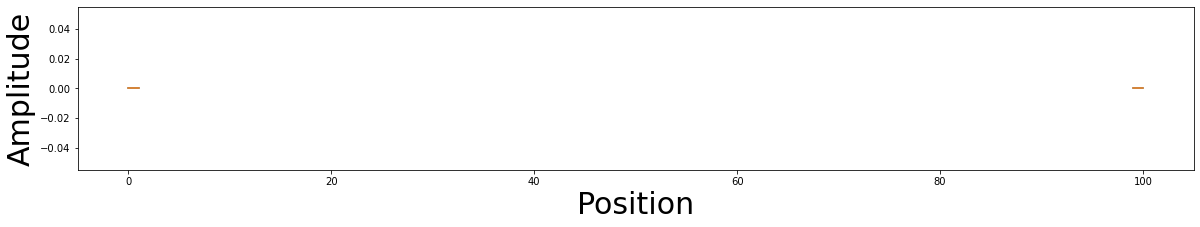

In [116]:
plt.figure(figsize=(20,3))
plt.plot(solution_matrix[100])
plt.plot(solution_matrix[20000])
plt.xlabel('Position', fontsize=30)
plt.ylabel('Amplitude', fontsize=30)
plt.show()

In [117]:
## Reading the text file written to by the rust binary
solution_matrix = np.loadtxt("solution_matrix.txt")

In [118]:
def integral(n):
    sin_array = np.sin(n*np.pi*np.linspace(0,1,101))
    return np.multiply(solution_matrix, sin_array).sum(axis=1)


hms = [integral(n) for n in range(10)]
tot = solution_matrix.sum(axis=1)[::10].astype(np.float32)



wavfile.write('sound.wav',20000,tot)

Audio('sound.wav')
